In [ ]:
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
import torchvision
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split
import torch.nn.functional as F

In [ ]:
fmnist = datasets.FashionMNIST('./data/fmnist/', train = True, download = True, 
                              transform = transforms.ToTensor())
val_fmist = datasets.FashionMNIST('./data/fmnist/', train = False, download = True,
                                  transform = transforms.ToTensor())


Extracting ./data/fmnist/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/fmnist/FashionMNIST/raw



Extracting ./data/fmnist/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/fmnist/FashionMNIST/raw



Extracting ./data/fmnist/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/fmnist/FashionMNIST/raw



Extracting ./data/fmnist/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/fmnist/FashionMNIST/raw
Processing...
Done!


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:479: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [ ]:
fmnist[0][0].shape
# 1 изображение, 28 ширина, 28 высота 

torch.Size([1, 28, 28])

In [ ]:
# изображение необходимо представить ввиде одномерного тензора
fmnist[0][0].view(1 * 28 * 28)

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000,
        0.0510, 0.2863, 0.0000, 0.0000, 0.0039, 0.0157, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0039, 0.0039, 0.0000, 

In [ ]:
#img, label = fmnist
class Not_Conv(nn.Module):
  def __init__(self, input_size, hidden_size, n_classes = 10):
      super().__init__()
      # слои:
      #self.bn1 = nn.BatchNorm1d(input_size)
      self.fc1 = nn.Linear(input_size, hidden_size)
      #self.bn2 = nn.BatchNorm1d(hidden_size)
      self.fc2 = nn.Linear(hidden_size, int(hidden_size/4))
      self.fc3 = nn.Linear(int(hidden_size/4), n_classes)
      # функции активации:
      self.sigmoid = nn.Sigmoid()
      self.relu = nn.ReLU()
      self.tanh = nn.Tanh()

  def forward(self, X):
    X = X.view(-1, 1*28*28)
    out = self.relu(self.fc1(X))
    out = self.relu(self.fc2(out))
    out = self.fc3(out)
    return out

In [ ]:
train_loader = DataLoader(fmnist, batch_size = 256, shuffle = True)
#est_loader = DataLoader(val_fmist, batch_size = len(val_fmist), shuffle= True)

device = torch.device('cuda' if torch.cuda.is_available else 'cpu')

model = Not_Conv(input_size = 1*28*28, hidden_size = 64).to(device)
loss = nn.CrossEntropyLoss()
optimizare = optim.Adam(model.parameters(), lr = 0.001)

n_epoch = 50 + 1
history_losses = list()
epochs = list()

for epoch in range(1, n_epoch):
  batch_loss = 0
  for img_train, label_train in train_loader:
    img_train, label_train = img_train.to(device), label_train.to(device)
    
    out = model(img_train)

    cur_loss = loss(out, label_train.squeeze())
    batch_loss += cur_loss
    
    cur_loss.backward()
    
    optimizare.step()
    optimizare.zero_grad()
  
  if epoch % 5 == 0:
    history_losses.append(batch_loss/len(train_loader))
    epochs.append(epoch)
    print(f'Epoch {epoch}: loss = {history_losses[-1]}')

Epoch 5: loss = 0.39783719182014465
Epoch 10: loss = 0.3467375934123993
Epoch 15: loss = 0.309763103723526
Epoch 20: loss = 0.2892321050167084
Epoch 25: loss = 0.27010878920555115
Epoch 30: loss = 0.2535504996776581
Epoch 35: loss = 0.23898397386074066
Epoch 40: loss = 0.22690540552139282
Epoch 45: loss = 0.21888794004917145
Epoch 50: loss = 0.20818652212619781


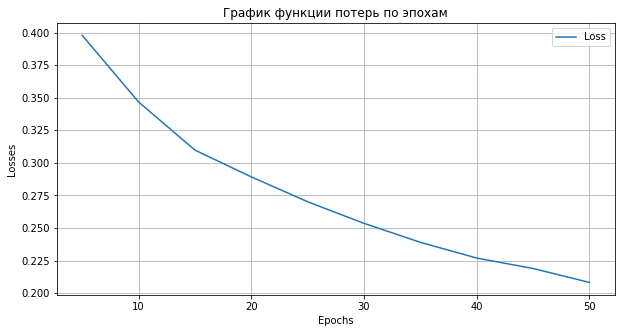

In [ ]:
fig, ax = plt.subplots(figsize = (10, 5))
plt.plot(epochs, history_losses, label = 'Loss')
plt.title('График функции потерь по эпохам')
plt.ylabel('Losses')
plt.xlabel('Epochs')
plt.legend()
plt.grid(True)

In [ ]:
val_loader = DataLoader(val_fmist, batch_size=32, shuffle=True)
len(val_loader.dataset)/32

312.5

In [ ]:
val_loader = DataLoader(val_fmist, batch_size=32, shuffle=True)
correct, total = 0, 0
with torch.no_grad():
  for imgs, labels in val_loader:
    # batch_size = imgs.shape[0] # Количество изображений в одном батче
    imgs, labels = imgs.to(device), labels.to(device)
    # forward
    out = model(imgs) #.view(batch_size, -1)).to(device)
    _, predicted = torch.max(out, dim = 1)
    total += labels.shape[0]
    correct += int((predicted == labels).sum())
print(f'Accuracy: {correct / total}')

Accuracy: 0.8765


In [ ]:
data1, target1 = next(iter(val_loader))
print(data1.shape, target1.shape)
data1, target1 = data1.to(device), target1.to(device)
output = model(data1).to(device)
_, predicted = torch.max(output, dim = 1) 
correct = predicted.eq(target1.view_as(predicted)).sum().item()    
print(correct)

torch.Size([32, 1, 28, 28]) torch.Size([32])
26


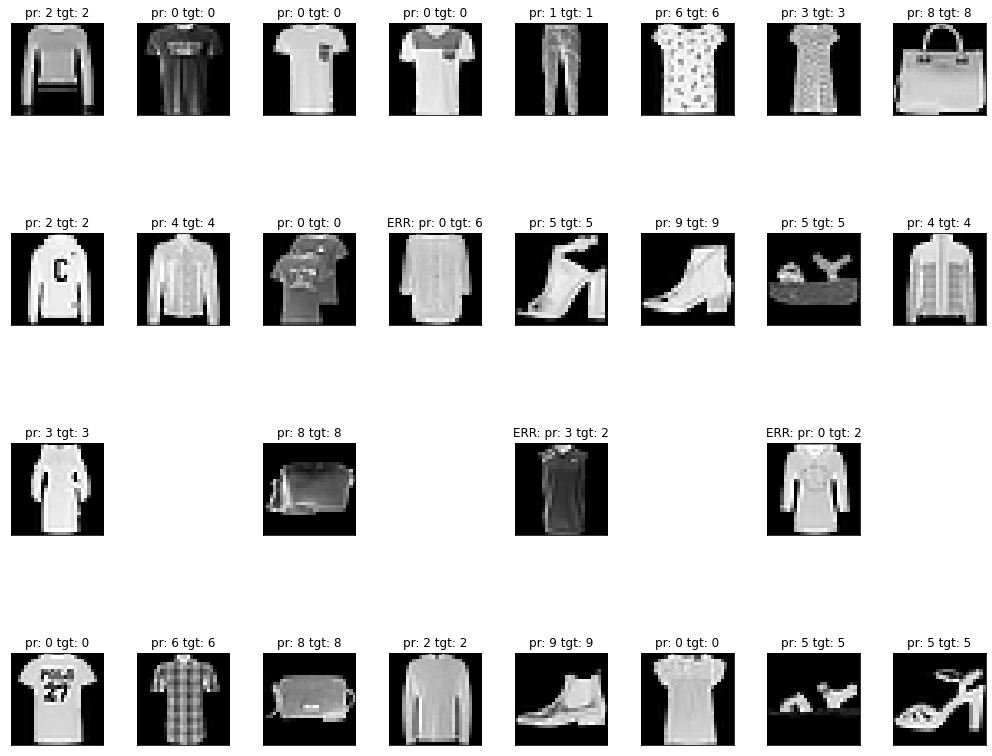

In [ ]:
img_qty = data1.shape[0]

fig = plt.figure(figsize=(14,12))

for i in range(img_qty):
    plt.subplot(4, 8, i+1)
    plt.tight_layout()
    plt.imshow(data1[i][0].to('cpu'), cmap='gray', interpolation='none')
    if predicted[i].item() == target1[i]:
        plt.title(f"pr: {predicted[i].item()} tgt: {target1[i]}")
    else:
        plt.title(f"ERR: pr: {predicted[i].item()} tgt: {target1[i]}")        
    plt.xticks([])
    plt.yticks([])

In [ ]:
from sklearn.metrics import confusion_matrix
print("Confusion Matrix : ")
confusion_matrix(predicted.to('cpu').reshape(-1).detach(), target1.to('cpu'))

Confusion Matrix : 


array([[5, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 5, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 1, 2, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 1, 0, 0],
       [0, 0, 0, 1, 1, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 6, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 3, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 2]])

In [ ]:
# использовать свертку нижу.

In [ ]:
img = torch.arange(16).view(1, 1, 4, 4).float()
img

tensor([[[[ 0.,  1.,  2.,  3.],
          [ 4.,  5.,  6.,  7.],
          [ 8.,  9., 10., 11.],
          [12., 13., 14., 15.]]]])

In [ ]:
conv = nn.Conv2d(1, 5, kernel_size = 3)
ex = conv(img)
print(ex.shape)
pool = nn.MaxPool2d(2)
print(pool(ex).shape)

torch.Size([1, 5, 2, 2])
torch.Size([1, 5, 1, 1])


In [ ]:
class NetConv(nn.Module):
  def __init__(self, input_size, hidden_size, n_classes = 10):
      super().__init__()
      self.conv1 = nn.Conv2d(1, 10, kernel_size = 5)
      self.conv2 = nn.Conv2d(10, 20, kernel_size = 5)
      self.fc1 = nn.Linear(20*4*4, hidden_size)
      self.fc2 = nn.Linear(hidden_size, n_classes)

  def forward(self, X):
    out = F.relu(F.max_pool2d(self.conv1(X), 2))
    out = F.relu(F.max_pool2d(self.conv2(out), 2))
    out = out.view(-1, 20*4*4)
    out = F.relu(self.fc1(out))
    out = self.fc2(out)
    return out

  def forward_conv1(self, X):
    out = F.relu(F.max_pool2d(self.conv1(X), 2))
    return out

In [ ]:
train_loader = DataLoader(fmnist, batch_size = 256, shuffle = True)

device = torch.device('cuda' if torch.cuda.is_available else 'cpu')

model = NetConv(input_size = 1*28*28, hidden_size = 64).to(device)
loss = nn.CrossEntropyLoss()
optimizare = optim.Adam(model.parameters(), lr = 0.001)

n_epoch = 50 + 1
history_losses = list()
epochs = list()

for epoch in range(1, n_epoch):
  batch_loss = 0
  for img_train, label_train in train_loader:
    img_train, label_train = img_train.to(device), label_train.to(device)
    
    out = model(img_train)

    cur_loss = loss(out, label_train.squeeze())
    batch_loss += cur_loss
    
    cur_loss.backward()
    
    optimizare.step()
    optimizare.zero_grad()
  
  if epoch % 5 == 0:
    history_losses.append(batch_loss/len(train_loader))
    epochs.append(epoch)
    print(f'Epoch {epoch}: loss = {history_losses[-1]}')

Epoch 5: loss = 0.3943258821964264
Epoch 10: loss = 0.32225853204727173
Epoch 15: loss = 0.27860113978385925
Epoch 20: loss = 0.24797846376895905
Epoch 25: loss = 0.2249721884727478
Epoch 30: loss = 0.20752142369747162
Epoch 35: loss = 0.19374218583106995
Epoch 40: loss = 0.17500969767570496
Epoch 45: loss = 0.1634795218706131
Epoch 50: loss = 0.15215271711349487


In [ ]:
val_loader = DataLoader(val_fmist, batch_size=32, shuffle=True)
correct, total = 0, 0
with torch.no_grad():
  for imgs, labels in val_loader:
    imgs, labels = imgs.to(device), labels.to(device)
    out = model(imgs)
    _, predicted = torch.max(out, dim = 1)
    total += labels.shape[0]
    correct += int((predicted == labels).sum())
print(f'Accuracy: {correct / total}')

Accuracy: 0.9017


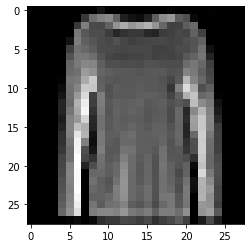

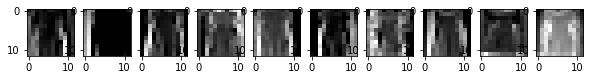

In [ ]:
imgs, targets = next(iter(train_loader))
imgs, targets = imgs.to(device), targets.to(device)
plt.imshow(imgs.to('cpu')[img_n][0], cmap='gray')

with torch.no_grad():
    imgs_part_1l = model.forward_conv1(imgs)
    nplots = imgs_part_1l.shape[1]
    ncols = 12
    
    nrows = 1 + nplots//ncols
    
    count = 0
    fig = plt.figure(figsize=(ncols, nrows))    
    #--------    
    
    for i in range(imgs_part_1l.shape[1]):
        count += 1
        ax1 = fig.add_subplot(nrows, ncols, count)

        ax1.imshow(imgs_part_1l.to('cpu')[img_n][i], cmap='gray')
    fig.show()

In [ ]:
model = nn.Sequential(nn.Conv2d(1, 20, 5, 1),
                      nn.ReLU(),
                      nn.MaxPool2d(2),
                      nn.Conv2d(20, 20, 5, 1),
                      nn.ReLU(),
                      nn.MaxPool2d(2),
                      nn.Flatten()
                      # nn.Linear(245, 64),
                      # nn.ReLU(),
                      # nn.Linear(64, 32),
                      # nn.ReLU(),
                      # nn.Linear(32, 10)
                      )

In [ ]:
train_loader = DataLoader(fmnist, batch_size=32, shuffle=True)
imgs, label = next(iter(train_loader))
model(imgs).shape

torch.Size([32, 320])

##  CIFAR 10

In [ ]:
 cifar = datasets.CIFAR10('./data/cifar10/', train = True, download = True, 
                              transform = transforms.Compose([
                                transforms.ToTensor(),
                                transforms.Normalize((0, ), (1, ))
                              ]))
 
 val_cifar = datasets.CIFAR10('./data/cifar10/', train = False, download = True, 
                              transform = transforms.Compose([
                                transforms.ToTensor(),
                                transforms.Normalize((0, ), (1, ))
                              ]))


Extracting ./data/cifar10/cifar-10-python.tar.gz to ./data/cifar10/
Files already downloaded and verified


In [ ]:
class Not_Conv2(nn.Module):
  def __init__(self, input_size, hidden_size, n_classes = 10):
      super().__init__()
      self.fc1 = nn.Linear(input_size, hidden_size)
      self.fc2 = nn.Linear(hidden_size, int(hidden_size/4))
      self.fc3 = nn.Linear(int(hidden_size/4), n_classes)

  def forward(self, X):
    X = X.view(-1, 3*32*32)
    out = F.relu(self.fc1(X))
    out = F.relu(self.fc2(out))
    out = self.fc3(out)
    return out

In [ ]:
input_size = cifar[0][0].shape[0]*cifar[0][0].shape[1]*cifar[0][0].shape[2]
input_size

3072

In [ ]:
train_loader = DataLoader(cifar, batch_size = 256, shuffle = True)

device = torch.device('cuda' if torch.cuda.is_available else 'cpu')

model = Not_Conv2(input_size = input_size, hidden_size = 64).to(device)
loss = nn.CrossEntropyLoss()
optimizare = optim.Adam(model.parameters(), lr = 0.001)

n_epoch = 50 + 1
history_losses = list()
epochs = list()

for epoch in range(1, n_epoch):
  batch_loss = 0
  for img_train, label_train in train_loader:
    img_train, label_train = img_train.to(device), label_train.to(device)
    
    out = model(img_train)

    cur_loss = loss(out, label_train.squeeze())
    batch_loss += cur_loss
    
    cur_loss.backward()
    
    optimizare.step()
    optimizare.zero_grad()
  
  if epoch % 5 == 0:
    history_losses.append(batch_loss/len(train_loader))
    epochs.append(epoch)
    print(f'Epoch {epoch}: loss = {history_losses[-1]}')

Epoch 5: loss = 1.6931418180465698
Epoch 10: loss = 1.5730786323547363
Epoch 15: loss = 1.512010931968689
Epoch 20: loss = 1.4768530130386353
Epoch 25: loss = 1.4478284120559692
Epoch 30: loss = 1.4316824674606323
Epoch 35: loss = 1.412646770477295
Epoch 40: loss = 1.3908195495605469
Epoch 45: loss = 1.3777941465377808
Epoch 50: loss = 1.372573971748352


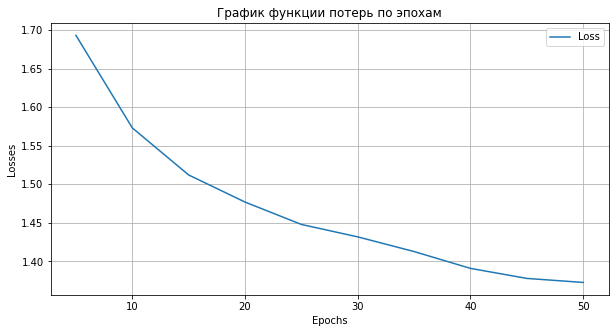

In [ ]:
fig, ax = plt.subplots(figsize = (10, 5))
plt.plot(epochs, history_losses, label = 'Loss')
plt.title('График функции потерь по эпохам')
plt.ylabel('Losses')
plt.xlabel('Epochs')
plt.legend()
plt.grid(True)

In [ ]:
val_loader = DataLoader(val_cifar, batch_size=32, shuffle=True)
correct, total = 0, 0
with torch.no_grad():
  for imgs, labels in val_loader:
    imgs, labels = imgs.to(device), labels.to(device)
    # forward
    out = model(imgs)
    _, predicted = torch.max(out, dim = 1)
    total += labels.shape[0]
    correct += int((predicted == labels).sum())
print(f'Accuracy for dataset CIFAR10: {correct / total}')

Accuracy for dataset CIFAR10: 0.4746


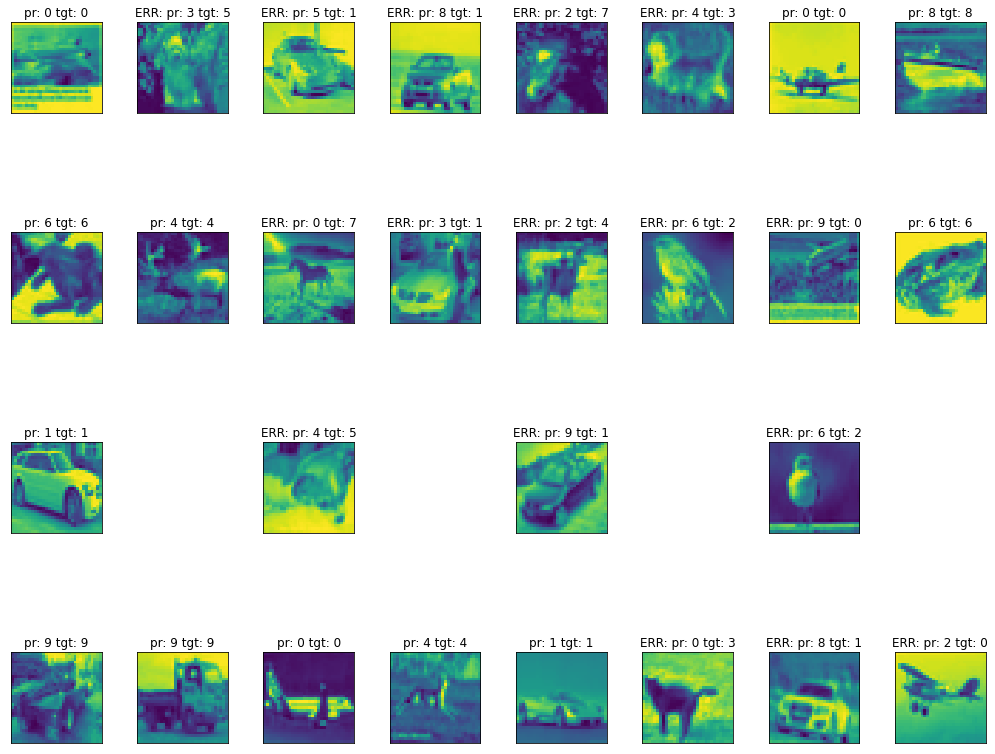

In [ ]:
data1, target1 = next(iter(val_loader))
data1, target1 = data1.to(device), target1.to(device)

output = model(data1).to(device)
_, predicted = torch.max(output, dim = 1)

img_qty = data1.shape[0]

fig = plt.figure(figsize=(14,12))

for i in range(img_qty):
    plt.subplot(4, 8, i+1)
    plt.tight_layout()
    plt.imshow(data1[i][0].to('cpu'), interpolation='none')
    if predicted[i].item() == target1[i]:
        plt.title(f"pr: {predicted[i].item()} tgt: {target1[i]}")
    else:
        plt.title(f"ERR: pr: {predicted[i].item()} tgt: {target1[i]}")        
    plt.xticks([])
    plt.yticks([])

In [ ]:
from sklearn.metrics import confusion_matrix
print("Confusion Matrix : ")
confusion_matrix(predicted.to('cpu').reshape(-1).detach(), target1.to('cpu'))

Confusion Matrix : 


array([[3, 0, 0, 1, 0, 0, 0, 1, 0, 0],
       [0, 3, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 1, 0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 1, 2, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 2, 0, 0, 0, 3, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 2, 0, 0, 0, 0, 0, 0, 2, 0],
       [1, 2, 0, 0, 0, 0, 0, 0, 0, 2]])

# Cifar10 with CNN

In [ ]:
class NetConv2(nn.Module):
  def __init__(self, input_size, hidden_size, n_classes = 10):
      super().__init__()
      self.layer_conv1 = nn.Sequential(nn.Conv2d(3, 32, kernel_size = 3),
                                 nn.ReLU(),
                                 nn.MaxPool2d(2))
      self.layer_conv2 = nn.Sequential(nn.Conv2d(32, 64, kernel_size = 3),
                                  #nn.Dropout2d(),
                                  nn.ReLU(),
                                  nn.MaxPool2d(2))
      self.layer_conv3 = nn.Sequential(nn.Conv2d(64, 64, kernel_size = 3),
                                  # nn.Dropout2d(),
                                  nn.ReLU(),
                                  nn.MaxPool2d(2))      
      self.layers = nn.Sequential(nn.Flatten(),
                                 nn.Linear(64*2*2, hidden_size),
                                 nn.ReLU(),
                                 nn.Dropout(),
                                 nn.Linear(hidden_size, n_classes))

  def forward(self, X):
    out = self.layer_conv1(X)
    out = self.layer_conv2(out)
    out = self.layer_conv3(out)
    out = self.layers(out)
    return out

  def forward_conv1(self, X):
    out = self.layer_conv1(X)
    return out

In [ ]:
train_loader = DataLoader(cifar, batch_size = 256, shuffle = True)

device = torch.device('cuda' if torch.cuda.is_available else 'cpu')

input_size = cifar[0][0].shape[0]*cifar[0][0].shape[1]*cifar[0][0].shape[2]

model = NetConv2(input_size = input_size, hidden_size = 64).to(device)
loss = nn.CrossEntropyLoss()
optimizare = optim.Adam(model.parameters(), lr = 0.001)

n_epoch = 100 + 1
history_losses = list()
epochs = list()

for epoch in range(1, n_epoch):
  batch_loss = 0
  for img_train, label_train in train_loader:
    img_train, label_train = img_train.to(device), label_train.to(device)
    
    out = model(img_train)

    cur_loss = loss(out, label_train.squeeze())
    batch_loss += cur_loss
    
    cur_loss.backward()
    
    optimizare.step()
    optimizare.zero_grad()
  
  if epoch % 5 == 0:
    history_losses.append(batch_loss/len(train_loader))
    epochs.append(epoch)
    print(f'Epoch {epoch}: loss = {history_losses[-1]}')

Epoch 5: loss = 1.5362341403961182
Epoch 10: loss = 1.3467355966567993
Epoch 15: loss = 1.2137097120285034
Epoch 20: loss = 1.1150028705596924
Epoch 25: loss = 1.0405278205871582
Epoch 30: loss = 0.9774709939956665
Epoch 35: loss = 0.9280464053153992
Epoch 40: loss = 0.8815835118293762
Epoch 45: loss = 0.85003262758255
Epoch 50: loss = 0.8199061751365662
Epoch 55: loss = 0.8009468913078308
Epoch 60: loss = 0.7763646245002747
Epoch 65: loss = 0.753491997718811
Epoch 70: loss = 0.725054144859314
Epoch 75: loss = 0.7055237293243408
Epoch 80: loss = 0.7002268433570862
Epoch 85: loss = 0.673585832118988
Epoch 90: loss = 0.6539887189865112
Epoch 95: loss = 0.6448051929473877
Epoch 100: loss = 0.6339629292488098
Epoch 105: loss = 0.6194550395011902
Epoch 110: loss = 0.6048614382743835
Epoch 115: loss = 0.6030082702636719
Epoch 120: loss = 0.5846019387245178
Epoch 125: loss = 0.5847396850585938
Epoch 130: loss = 0.5714408755302429
Epoch 135: loss = 0.5565690398216248
Epoch 140: loss = 0.551190

In [ ]:
val_loader = DataLoader(val_cifar, batch_size=32, shuffle=True)
correct, total = 0, 0
with torch.no_grad():
  for imgs, labels in val_loader:
    imgs, labels = imgs.to(device), labels.to(device)
    out = model(imgs)
    _, predicted = torch.max(out, dim = 1)
    total += labels.shape[0]
    correct += int((predicted == labels).sum())
print(f'Accuracy: {correct / total}')

Accuracy: 0.6577


In [ ]:
torch.save(model, './data/model.pth')

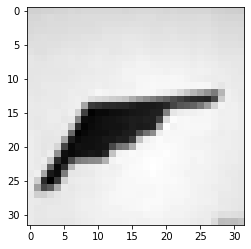

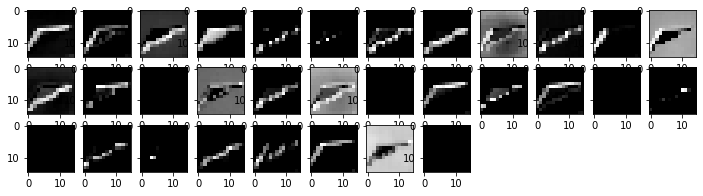

In [ ]:
imgs, targets = next(iter(val_loader))
imgs, targets = imgs.to(device), targets.to(device)
img_n = 5
plt.imshow(imgs.to('cpu')[img_n][0], cmap='gray')

output = model(imgs).to(device)
_, predicted = torch.max(output, dim = 1)

with torch.no_grad():
    imgs_part_1l = model.forward_conv1(imgs)
    nplots = imgs_part_1l.shape[1]
    ncols = 12
    
    nrows = 1 + nplots//ncols
    
    count = 0
    fig = plt.figure(figsize=(ncols, nrows))    
    #--------    
    
    for i in range(imgs_part_1l.shape[1]):
        count += 1
        ax1 = fig.add_subplot(nrows, ncols, count)

        ax1.imshow(imgs_part_1l.to('cpu')[img_n][i], cmap='gray')
    fig.show()

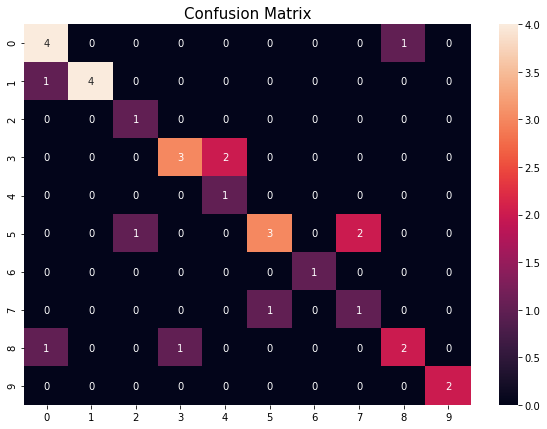

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
#print("Confusion Matrix : ")
fig, ax = plt.subplots(figsize = (10, 7))
sns.heatmap(confusion_matrix(predicted.to('cpu').reshape(-1).detach(), targets.to('cpu')), annot = True)
plt.title("Confusion Matrix", size = 15);

# Monkeys

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import zipfile
from tqdm import tqdm

zf = zipfile.ZipFile('drive/MyDrive/DL_dataset/monkeys.zip')
for file in tqdm(zf.infolist()):
    zf.extract(file)

100%|██████████| 1371/1371 [00:16<00:00, 83.78it/s]


In [ ]:
import torchvision
from torchvision.datasets import ImageFolder
import torch.nn as nn
import torch
import torch.optim as optim
from torch.utils.data import DataLoader, random_split
import torch.nn.functional as F
from torchvision import datasets, transforms
import numpy as np

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# from google.colab import files
# src = list(files.upload().values())[0]
# open('pytorchtools_st.py','wb').write(src)
from pytorchtools_st import EarlyStopping

In [ ]:
#!pip install pytorch_lightning
#from pytorch_lightning.callbacks import EarlyStopping

In [ ]:
train_monkeys = ImageFolder('training/training', transform = transforms.Compose([transforms.Resize([300, 300]), 
                                                                                 transforms.ToTensor()]))

In [ ]:
# train_size = int(np.floor(len(train_monkeys)*0.8))
# val_size = len(train_monkeys) - train_size 

# dataset_train, dataset_val = random_split(train_monkeys, [train_size, val_size]) # Разделение на тренировчоную и вылидационные выборки

train_loader = DataLoader(train_monkeys, batch_size = 32, shuffle = True)
#val_loader = DataLoader(dataset_val, batch_size = len(dataset_val), shuffle = True)


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
#torch.cuda.memory_summary(device=device, abbreviated=True)

model = nn.Sequential(nn.Conv2d(3, 20, kernel_size=3, padding=1),
                      nn.BatchNorm2d(20), 
                      nn.ReLU(),
                      nn.MaxPool2d(kernel_size=2),
                      nn.Conv2d(20, 40, kernel_size=3, padding=1),
                      nn.BatchNorm2d(40), 
                      nn.ReLU(),
                      nn.MaxPool2d(kernel_size=2),
                      nn.Flatten(),
                      nn.Linear(40*75*75, 64),
                      nn.ReLU(),
                      nn.Dropout(),
                      nn.Linear(64, 32),
                      nn.ReLU(),
                      nn.Dropout(),
                      nn.Linear(32, 10)
                      ).to(device='cpu')

loss = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

early_stop = EarlyStopping(delta = 0.5, patience = 3, verbose = False) # Ранняя остановка

n_epochs = 500

train_history_loss = list()
# val_history_loss = list()
epochs_history = list()

for epoch in range(1, n_epochs + 1):
  epoch_loss = 0
  # val_epoch_loss = 0

  model.train() # явно указываем обучение
  for X_batch, y_batch in train_loader:
    X_batch, y_batch = X_batch.to(device='cpu'), y_batch.to(device='cpu')
    # forward
    out = model(X_batch)
    # loss
    batch_loss = loss(out, y_batch)
    # backward
    batch_loss.backward()
    # optimization
    optimizer.step()
    optimizer.zero_grad()
    epoch_loss += batch_loss.item()

  # model.eval()
  # for X_val, y_val in val_loader:
  #   X_val, y_val = X_val.to(device=device), y_val.to(device=device)
  #   pred = model(X_val)
  #   val_loss = loss(pred, y_val)
  #   val_epoch_loss += val_loss

  train_history_loss.append(epoch_loss/len(train_loader))
  # val_history_loss.append(val_epoch_loss/len(val_loader))
  epochs_history.append(epoch)

  if epoch % 2 == 0:
    print(f'Epoch: [{epoch}/{n_epochs}], Train_loss: {train_history_loss[-1]}') # , Val_loss: {val_history_loss[-1]}')

  early_stop(train_history_loss[-1], model)
  
  if early_stop.early_stop:
      print(f"Early stopping on epoch: [{epoch}/{n_epochs}]")
      break

Epoch: [2/500], Train_loss: 2.312148884364537
EarlyStopping counter: 1 out of 3
Epoch: [4/500], Train_loss: 2.305630363736834
EarlyStopping counter: 2 out of 3
EarlyStopping counter: 3 out of 3
Early stopping on epoch: [5/500]


In [ ]:
torch.save(model, '/content/drive/MyDrive/DL_dataset/model_monkeys.pth')

In [ ]:
test_monkeys = ImageFolder('validation/validation', transform = transforms.Compose([transforms.Resize([300, 300]), 
                                                                                     transforms.ToTensor()]))
test_loader = DataLoader(test_monkeys, batch_size = len(test_monkeys), shuffle = True)
correct, total = 0, 0
model.eval()
for X_test, y_test in test_loader:
  targets = y_test
  predicted = model(X_test)

  _, predicted = torch.max(predicted, dim=1)
  total += y_test.shape[0]
  correct += int((predicted == y_test).sum())

print(f'Accuracy: {correct / total}')

In [ ]:
test_loader_img = DataLoader(dataset_val, batch_size = 32, shuffle = True)

data1, target1 = next(iter(test_loader_img))

output = model(data1)

_, predicted = torch.max(output, dim = 1)

img_qty = data1.shape[0]

fig = plt.figure(figsize=(14,12))

for i in range(img_qty):
    plt.subplot(4, 8, i+1)
    plt.tight_layout()
    plt.imshow(data1[i][0].to('cpu'), interpolation='none')
    if predicted[i].item() == target1[i]:
        plt.title(f"pr: {predicted[i].item()} tgt: {target1[i]}")
    else:
        plt.title(f"ERR: pr: {predicted[i].item()} tgt: {target1[i]}")        
    plt.xticks([])
    plt.yticks([])

In [ ]:
fig, ax = plt.subplots(figsize = (10, 7))
sns.heatmap(confusion_matrix(predicted.to('cpu').reshape(-1).detach(), targets.to('cpu')), annot = True)
plt.title("Confusion Matrix", size = 15)
plt.xlabel('Predicts')
plt.ylabel('Targets');